In [1]:
# Import necessary libraries for data manipulation (pandas), numerical operations (numpy), and data visualization (matplotlib and seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Problem - 1: Getting Started with Data Exploration - Some Warm up Exercises:

##1. Data Exploration and Understanding:

###• Dataset Overview:

1. Load the dataset and display the first 10 rows.
2. Identify the number of rows and columns in the dataset.
3. List all the columns and their data types.

In [4]:
#Load WHR dataset and display first ten rows
dataset = pd.read_csv('/content/drive/MyDrive/Assessment-1/WHR-2024-5CS037.csv')
print(dataset.head(10))

#Identify the number of rows and columns in WHR dataset
print("\nNumber of rows and columns:")
print(dataset.shape)
print(f"Number of Rows: {dataset.shape[0]}")
print(f"Number of Columns: {dataset.shape[1]}\n")

#List all the columns with their data types
print("List of columns and their data types:")
print(dataset.dtypes)

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

###• Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.
2. Identify the country with the highest and lowest happiness scores.

In [5]:
#Calculate mean, median and standard deviation for the score column
mean = dataset['score'].mean()
median = dataset['score'].median()
std = dataset['score'].std()
print(f"Mean: {mean:.3f}")
print(f"Median: {median:.3f}")
print(f"Standard Deviation: {std:.3f}")

#Identify the highest and lowest happiness score holding countries
highest_happiness_score = dataset[dataset['score'] == dataset['score'].max()]
lowest_happiness_score = dataset[dataset['score'] == dataset['score'].min()]
print("\nCountry with Highest Score:")
print(highest_happiness_score[['Country name', 'score']])
print("\nCountry with Lowest Score:")
print(lowest_happiness_score[['Country name', 'score']])

Mean: 5.528
Median: 5.785
Standard Deviation: 1.171

Country with Highest Score:
  Country name  score
0      Finland  7.741

Country with Lowest Score:
    Country name  score
142  Afghanistan  1.721


###• Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.


In [6]:
#Check missing values in the dataset
missing_values = dataset.isnull().sum()
print("Total count of missing values in each column:")

#Print the total count for each column
print(missing_values)

Total count of missing values in each column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64



###• Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.
2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.italicized text

In [7]:
#Filter the dataset of the countries with the score greater than 7.5
high_score_countries = dataset[dataset['score'] > 7.5]
print("Countries with a Score greater than 7.5:")
print(high_score_countries[['Country name', 'score']],"\n")

#Sort the filtered dataset by GDP per capita in decscending order
sorted_gdp = high_score_countries.sort_values('Log GDP per capita', ascending=False)
print("Top high-scoring countries sorted by GDP per capita for filtered dataset:")
print(sorted_gdp[['Country name', 'score', 'Log GDP per capita']].head(3),"\n")

#Sort the whole dataset by GDP per capita in decscending order
sorted_gdp = dataset.sort_values('Log GDP per capita', ascending=False)
print("Top 10 high-scoring countries sorted by GDP per capita for whole dataset:")

#Display top ten rows od the sorted dataset
print(sorted_gdp[['Country name', 'score', 'Log GDP per capita']].head(10))

Countries with a Score greater than 7.5:
  Country name  score
0      Finland  7.741
1      Denmark  7.583
2      Iceland  7.525 

Top high-scoring countries sorted by GDP per capita for filtered dataset:
  Country name  score  Log GDP per capita
1      Denmark  7.583               1.908
2      Iceland  7.525               1.881
0      Finland  7.741               1.844 

Top 10 high-scoring countries sorted by GDP per capita for whole dataset:
                 Country name  score  Log GDP per capita
7                  Luxembourg  7.122               2.141
16                    Ireland  6.838               2.129
29                  Singapore  6.523               2.118
21       United Arab Emirates  6.733               1.983
8                 Switzerland  7.060               1.970
6                      Norway  7.302               1.952
22              United States  6.725               1.939
85  Hong Kong S.A.R. of China  5.316               1.909
1                     Denmark  7.583  

###• Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories based on their Score:

  Low − (Score < 4)

  Medium − (4 ≤ Score ≤ 6)

  High − (Score > 6)

In [8]:
#Define a function that categorized countries into Low, Medium and High based on their score
def get_happiness_category(score):
    if score < 4:
        return 'Low'
    elif score <= 6:
        return 'Medium'
    else:
        return 'High'

#Create a new column 'Happiness Category' with the returned value High, Low and Medium
dataset['Happiness Category'] = dataset['score'].apply(get_happiness_category)
updated_dataset=(dataset[['Country name', 'score', 'Happiness Category']])
updated_dataset.head(143)


,Country name,score,Happiness Category
0,Finland,7.741,High
1,Denmark,7.583,High
2,Iceland,7.525,High
3,Sweden,7.344,High
4,Israel,7.341,High
...,...,...,...
138,Congo (Kinshasa),3.295,Low
139,Sierra Leone,3.245,Low
140,Lesotho,3.186,Low
141,Lebanon,2.707,Low


In [9]:
#Print the total count of each happiness categories
print(dataset['Happiness Category'].value_counts())

Happiness Category
Medium    70
High      56
Low       17
Name: count, dtype: int64


##2. Data Visualizations:


###• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

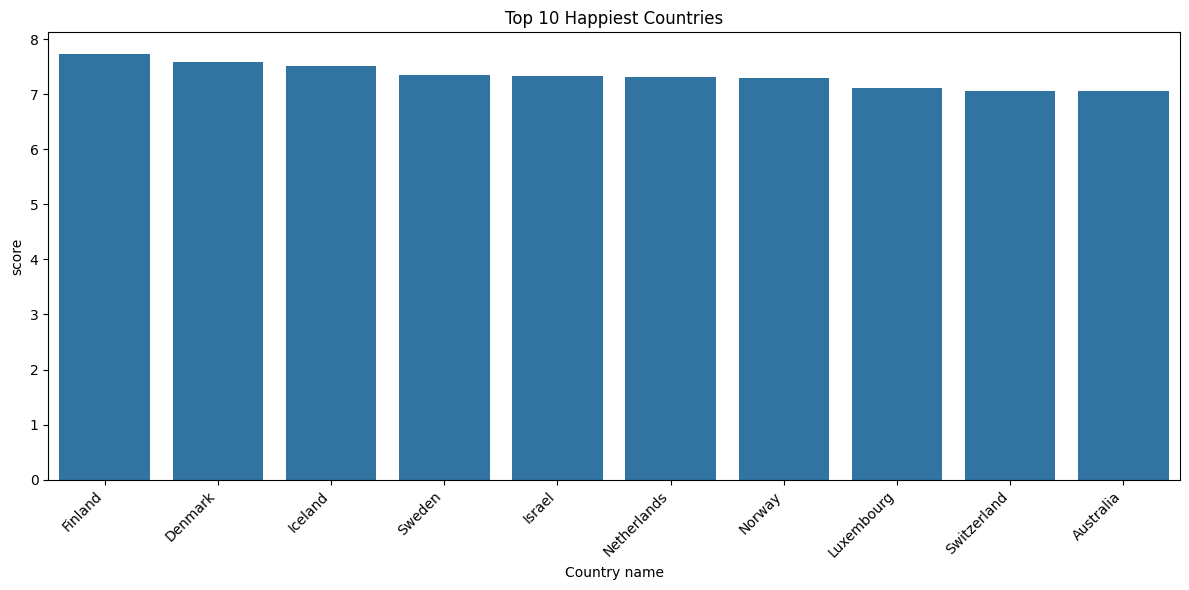

In [10]:
#Plot the top ten happiest countries by Score using bar chart
plt.figure(figsize=(12, 6))
top10_happiest_countries = dataset.nlargest(10, 'score')
sns.barplot(data=top10_happiest_countries, x='Country name', y='score')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Happiest Countries')
plt.tight_layout()
plt.show()

###• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

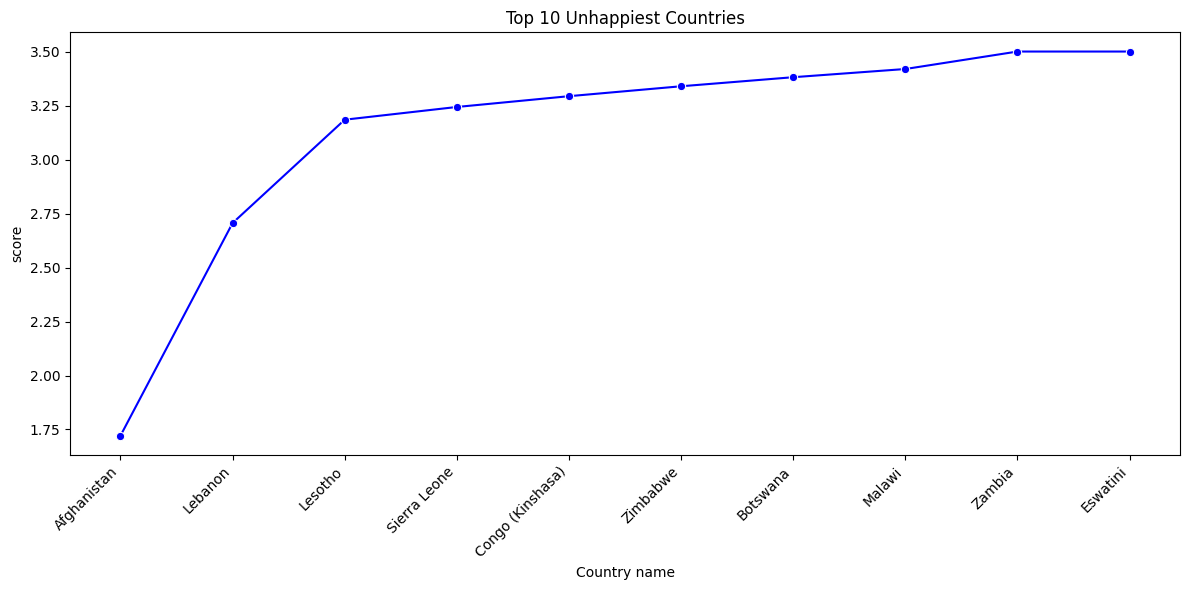

In [11]:
#Plot the top ten unhappiest countries by Score using Line chart
plt.figure(figsize=(12, 6))
bottom10_unhappiest_countries = dataset.nsmallest(10, 'score')
sns.lineplot(data=bottom10_unhappiest_countries, x='Country name', y='score',marker='o',color='blue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Unhappiest Countries')
plt.tight_layout()
plt.show()

###• Plot a histogram for the Score column to show its distribution and also interpret.

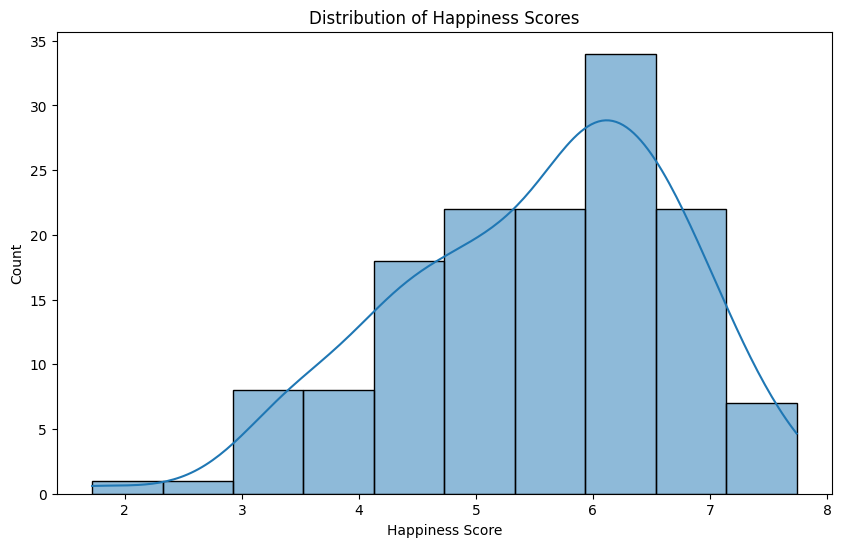

In [12]:
#Plot histogram for the Score column to show it's ditribution
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='score', bins=10, kde=True)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Count')
plt.show()


###• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

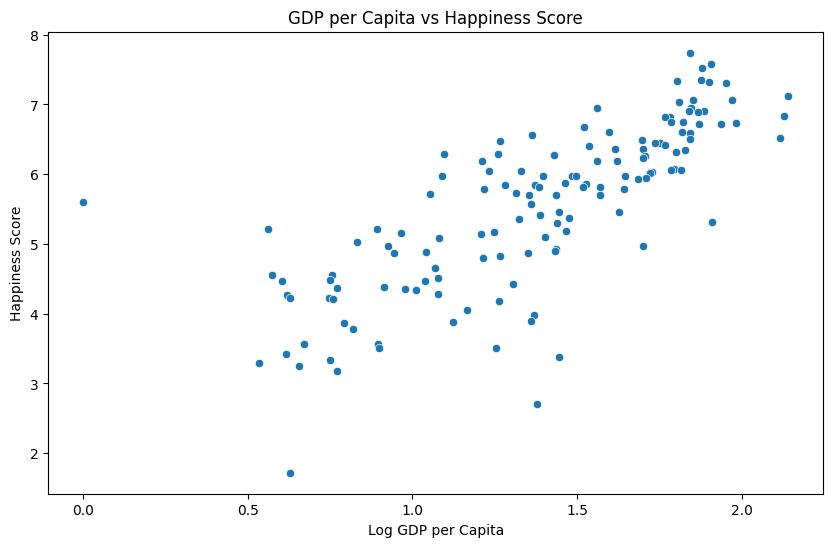

In [13]:
#Plot a scatter plot between GDP per Capita and Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Log GDP per capita', y='score')
plt.title('GDP per Capita vs Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

#Problem - 2 - Some Advance Data Exploration Task:

##Task - 1 - Setup Task - Preparing the South-Asia Dataset:
Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.

In [14]:
# Define South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                        "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Filter South Asian countries
south_asia_dataset = dataset[dataset['Country name'].isin(south_asian_countries)]

# Save the filtered dataframe to CSV
south_asia_dataset.to_csv('/content/drive/MyDrive/Assessment-1/south_asia_happiness.csv', index=False)

# Display the filtered dataset
print("\nSouth Asian Countries Data:")
south_asia_dataset


South Asian Countries Data:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


##Task - 2 - Composite Score Ranking:
Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the following metrics:

  Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy
2. Rank the South Asian countries based on the Composite Score in descending order.
3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

<ipython-input-15-fb7e0f3a6e1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_dataset['Composite Score'] = (



South Asian Countries Ranked by Composite Score:
    Country name  Composite Score  score
127    Sri Lanka           1.0739  3.898
92         Nepal           0.8159  5.158
125        India           0.7874  4.054
107     Pakistan           0.7039  4.657
128   Bangladesh           0.6774  3.886
142  Afghanistan           0.3238  1.721 



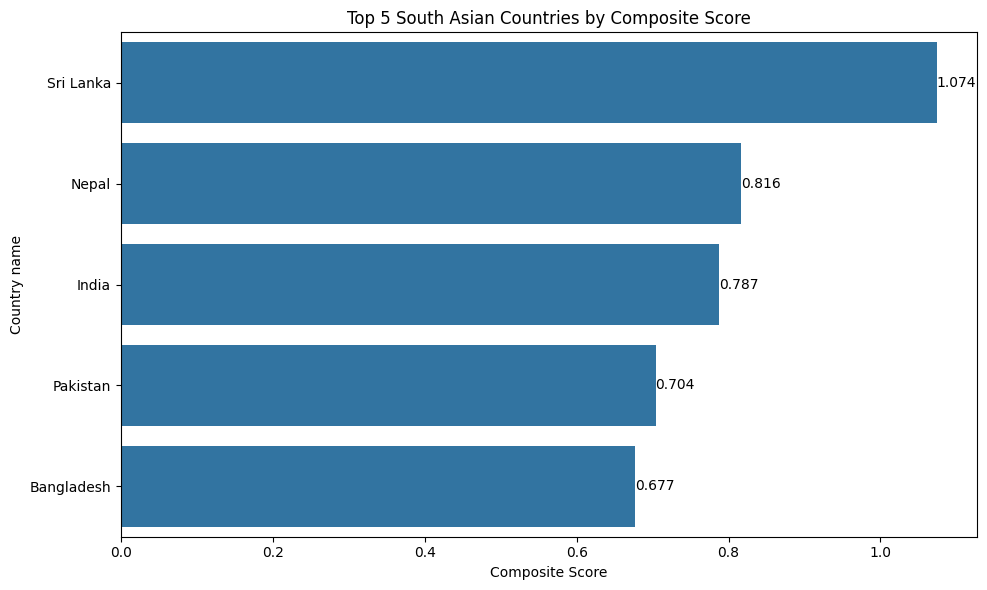

In [15]:
# Calculate Composite Score
south_asia_dataset['Composite Score'] = (
    0.40 * south_asia_dataset['Log GDP per capita'] +
    0.30 * south_asia_dataset['Social support'] +
    0.30 * south_asia_dataset['Healthy life expectancy']
)

# Rank countries by Composite Score in descending order
ranked_countries = south_asia_dataset.sort_values('Composite Score', ascending=False)

# Display rankings
print("\nSouth Asian Countries Ranked by Composite Score:")
print(ranked_countries[['Country name', 'Composite Score', 'score']],"\n")

# Visualize the top 5 countries
plt.figure(figsize=(10, 6))
top_5 = ranked_countries.head(5)

# Create horizontal bar chart
sns.barplot(data=top_5, x='Composite Score', y='Country name', orient='h')
plt.title('Top 5 South Asian Countries by Composite Score')

# Add value labels to bars
for i, v in enumerate(top_5['Composite Score']):
    plt.text(v, i, f'{v:.3f}', va='center')

plt.tight_layout()
plt.show()


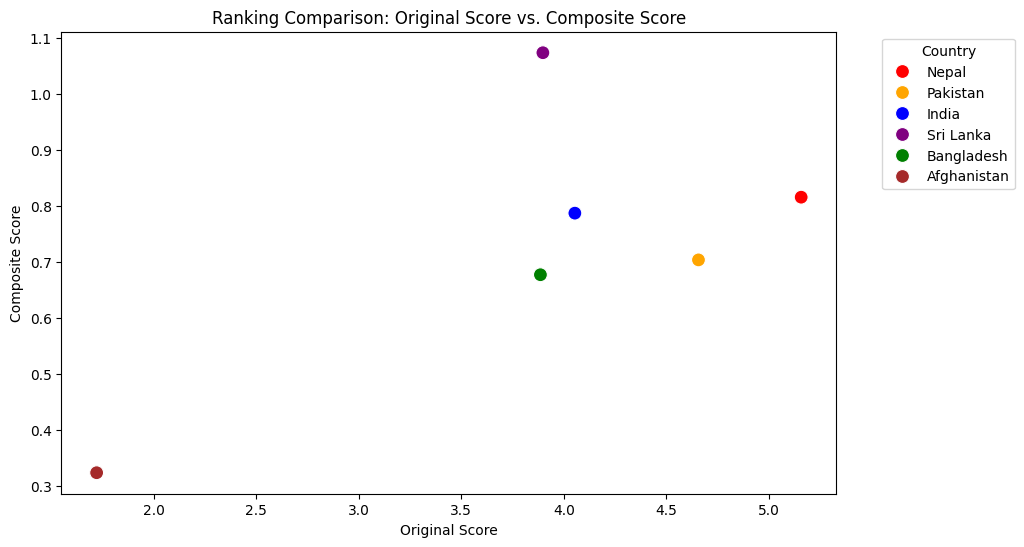


Review the rankings:
     Country name  score  Composite Score
92         Nepal  5.158           0.8159
107     Pakistan  4.657           0.7039
125        India  4.054           0.7874
127    Sri Lanka  3.898           1.0739
128   Bangladesh  3.886           0.6774
142  Afghanistan  1.721           0.3238


In [16]:
#Compare rankings based on the Composite Score align with the original Score
plt.figure(figsize=(10, 6))
custom_palette = {
    'Nepal': 'red',
    'India': 'blue',
    'Bangladesh': 'green',
    'Sri Lanka': 'purple',
    'Pakistan': 'orange',
    'Afghanistan': 'brown'
}

sns.scatterplot(x='score', y='Composite Score', data=south_asia_dataset, hue = 'Country name' , palette=custom_palette, s=100)
plt.title('Ranking Comparison: Original Score vs. Composite Score')
plt.xlabel('Original Score')
plt.ylabel('Composite Score')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

alignment = south_asia_dataset[['Country name', 'score', 'Composite Score']].copy()
print("\nReview the rankings:\n", alignment)


Sri Lanka has the highest rank in the Composite Score (1.0739), while it ranks fourth in the Original Score (3.898). Nepal has the highest Original Score (5.158), while it has ranks second in the Composite Score (0.8159).

Here, in Composite score, the score of Pakistan drops and the score of India gets a rise comparing to their original score.

While both Bangladesh and Afghanistan seems to maintain their lower ranking in both fields. Afghanistan being the last and Bangladesh being the second-last.




##Task - 3 - Outlier Detection:
Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.
4. Discuss the characteristics of these outliers and their potential impact on regional averages.

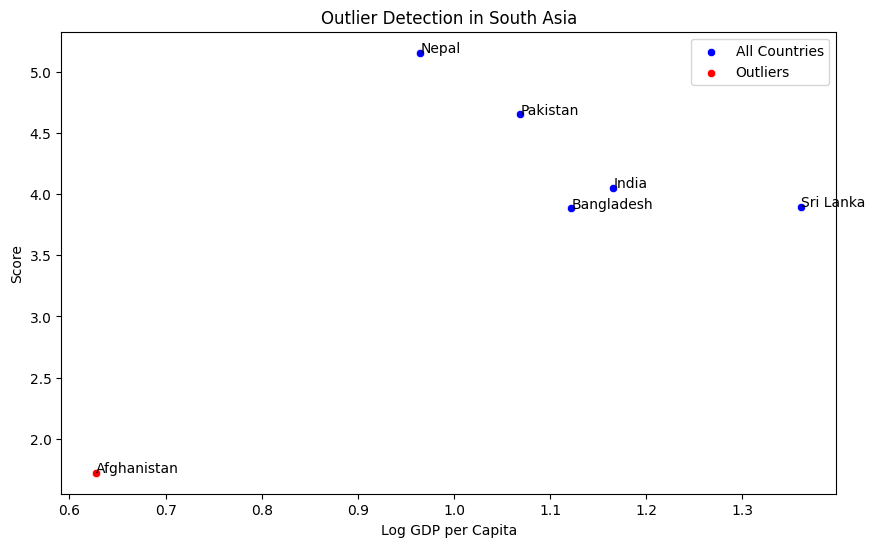

Outlier Countries:


,Country name,Log GDP per capita,score
142,Afghanistan,0.628,1.721


In [17]:

#Claculate the IQR for 'score' and 'GDP per Capita'
score_IQR = south_asia_dataset['score'].quantile(0.75) - south_asia_dataset['score'].quantile(0.25)
gdp_IQR = south_asia_dataset['Log GDP per capita'].quantile(0.75) - south_asia_dataset['Log GDP per capita'].quantile(0.25)

# Calculate the lower and upper bounds for both 'score' and 'GDP per Capita' using the 1.5 * IQR rule
score_lower_bound = south_asia_dataset['score'].quantile(0.25) - 1.5 * score_IQR
score_upper_bound = south_asia_dataset['score'].quantile(0.75) + 1.5 * score_IQR

gdp_lower_bound = south_asia_dataset['Log GDP per capita'].quantile(0.25) - 1.5 * gdp_IQR
gdp_upper_bound = south_asia_dataset['Log GDP per capita'].quantile(0.75) + 1.5 * gdp_IQR

#Identify outliers based on the bounds
outliers = south_asia_dataset[(south_asia_dataset['score'] < score_lower_bound) |
                     (south_asia_dataset['score'] > score_upper_bound) |
                     (south_asia_dataset['Log GDP per capita'] < gdp_lower_bound) |
                     (south_asia_dataset['Log GDP per capita'] > gdp_upper_bound)
                     ]
# Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_dataset, color='blue', label='All Countries')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers, color='red', label='Outliers')
plt.title('Outlier Detection in South Asia')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')

for i, row in south_asia_dataset.iterrows():
    plt.annotate(row['Country name'],
                (row['Log GDP per capita'], row['score']))
plt.legend()
plt.show()

# Print the data for outlier countries
print("Outlier Countries:")
outlier_countries = (outliers[['Country name', 'Log GDP per capita', 'score']])
outlier_countries


Looking at South Asia's happiness data, Afghanistan stands out as significantly different from its neighbors. Its happiness score of 1.721 and economic measures are much lower than other countries in the region. This has a big effect on the region's overall picture - when we include Afghanistan, the average happiness score for South Asia is 3.90, but if we leave it out, the average rises to 4.33. This means Afghanistan's very low scores make the whole region appear less happy and less developed than most of its countries actually are.

##Task - 4 - Exploring Trends Across Metrics:
Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.
2. Create scatter plots with trendlines for these metrics against the Score.
3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.


Correlations with Happiness Score:
Freedom to make life choices: 0.8005185224163315
Generosity: 0.874512371253192




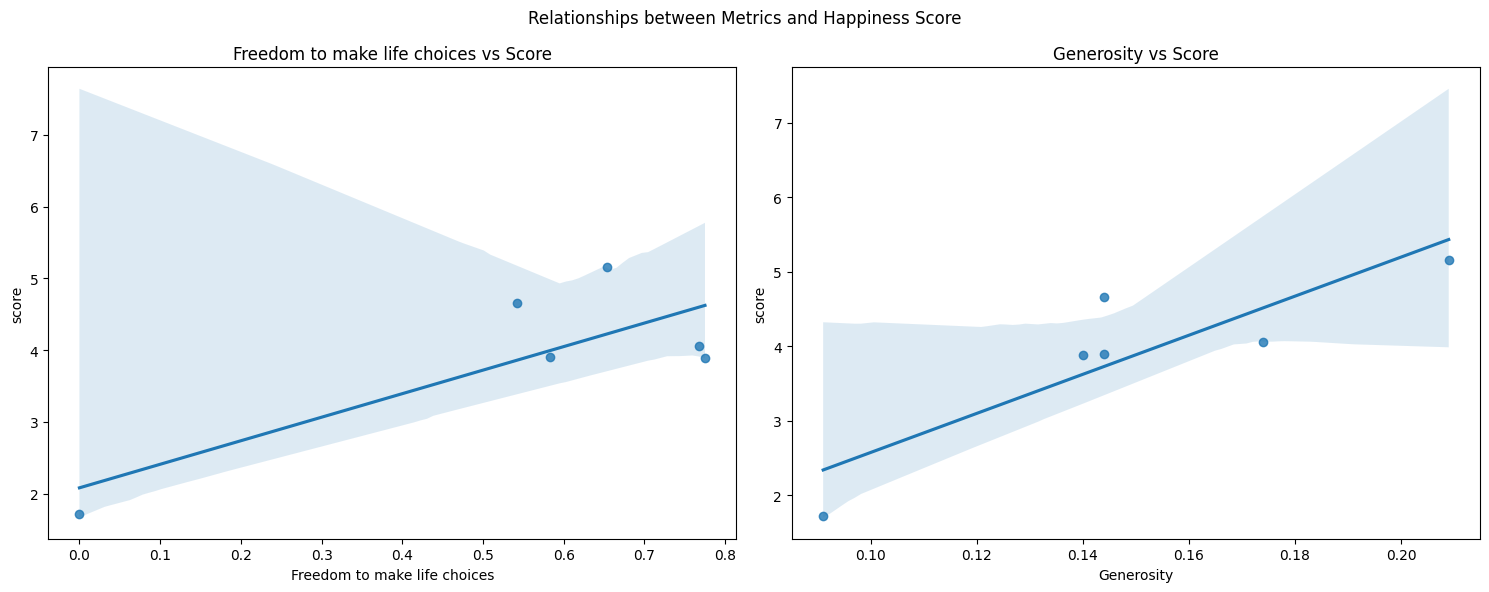

In [18]:
# Calculate correlations with the Score for South Asian countries.
metrics = ['Freedom to make life choices', 'Generosity']
correlations = {}
for metric in metrics:
    corr = south_asia_dataset['score'].corr(south_asia_dataset[metric])
    correlations[metric] = corr

print("\nCorrelations with Happiness Score:")
for metric, corr in correlations.items():
    print(f"{metric}: {corr}")

print("\n")
# Create scatter plots with trend lines
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Relationships between Metrics and Happiness Score')

for i, metric in enumerate(metrics):
    sns.regplot(data=south_asia_dataset, x=metric, y='score', ax=axes[i])
    axes[i].set_title(f'{metric} vs Score')

plt.tight_layout()
plt.show()

##Task - 5 - Gap Analysis:
Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.
2. Rank the South Asian countries by this gap in both ascending and descending order.
3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
4. Analyze the reasons behind these gaps and their implications for South Asian countries.

<ipython-input-19-9b637ba59d51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_dataset['GDP-Score Gap'] = south_asia_dataset['Log GDP per capita'] - south_asia_dataset['score']



Countries Ranked by GDP-Score Gap (Ascending):
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
127    Sri Lanka         -2.537
142  Afghanistan         -1.093

Countries Ranked by GDP-Score Gap (Descending):
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


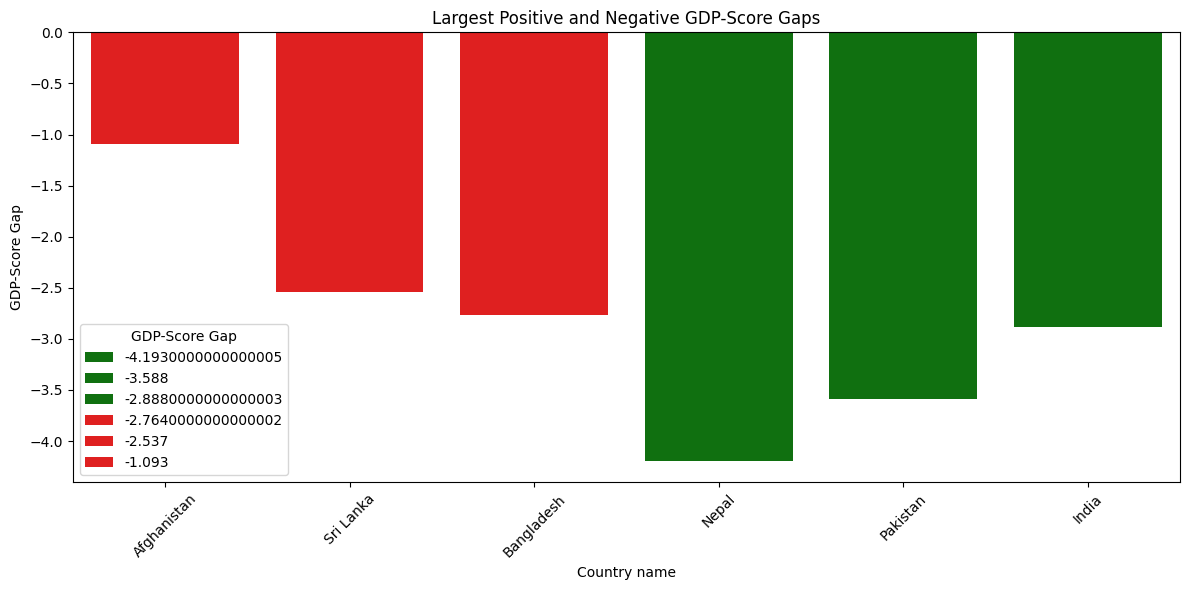

In [19]:
# Calculate GDP-Score Gap
south_asia_dataset['GDP-Score Gap'] = south_asia_dataset['Log GDP per capita'] - south_asia_dataset['score']

# Sort by gap in both orders
print("\nCountries Ranked by GDP-Score Gap (Ascending):")
print(south_asia_dataset.sort_values('GDP-Score Gap')[['Country name', 'GDP-Score Gap']])

print("\nCountries Ranked by GDP-Score Gap (Descending):")
print(south_asia_dataset.sort_values('GDP-Score Gap', ascending=False)[['Country name', 'GDP-Score Gap']])

# Visualize top 3 positive and negative gaps
plt.figure(figsize=(12, 6))
gaps = pd.concat([
    south_asia_dataset.nlargest(3, 'GDP-Score Gap'),
    south_asia_dataset.nsmallest(3, 'GDP-Score Gap')
])

#Plot using barplot
sns.barplot(data=gaps, x='Country name', y='GDP-Score Gap', hue='GDP-Score Gap', palette=['green']*3 + ['red']*3
)
plt.xticks(rotation=45)
plt.title('Largest Positive and Negative GDP-Score Gaps')
plt.ylabel('GDP-Score Gap')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

In [20]:
#Analyze the reasons behind these gaps and their implications for South Asian countries.

print("\n Top three countries with Largets Positive GDP - Score Gaps:")
top_3_positive = south_asia_dataset.nlargest(3, 'GDP-Score Gap')
print(top_3_positive[['Country name', 'GDP-Score Gap']])

print("\n Top three countries with Largets Negative GDP - Score Gaps:")
top_3_negative = south_asia_dataset.nsmallest(3, 'GDP-Score Gap')
print(top_3_negative[['Country name', 'GDP-Score Gap']])

#Discuss the possible reasons for these gaps:
print('\n Analysis of gaps:')
for idx, row in top_3_positive.iterrows():
  print(f"\nCountry: {row['Country name']}")
  print(f"GDP per Capita: {row['Log GDP per capita']}, score: {row['score']}")
  print(f"GDP-Score Gap: {row['GDP-Score Gap']}")
  print("Possible reason for gap: The country's GDP per Capita is much higher than its Composite Score, "
          "indicating that factors such as income inequality, social support, or life expectancy may not "
          "be as favorable despite higher economic output.")

for idx, row in top_3_negative.iterrows():
  print(f"\nCountry: {row['Country name']}")
  print(f"GDP per Capita: {row['Log GDP per capita']}, score: {row['score']}")
  print(f"GDP-Score Gap: {row['GDP-Score Gap']}")
  print("Possible reason for gap: The country's GDP per Capita is significantly lower than its Composite Score, "
          "indicating that factors such as better social support, healthcare, or life expectancy might be "
          "compensating for the lower income levels.")




 Top three countries with Largets Positive GDP - Score Gaps:
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764

 Top three countries with Largets Negative GDP - Score Gaps:
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888

 Analysis of gaps:

Country: Afghanistan
GDP per Capita: 0.628, score: 1.721
GDP-Score Gap: -1.093
Possible reason for gap: The country's GDP per Capita is much higher than its Composite Score, indicating that factors such as income inequality, social support, or life expectancy may not be as favorable despite higher economic output.

Country: Sri Lanka
GDP per Capita: 1.361, score: 3.898
GDP-Score Gap: -2.537
Possible reason for gap: The country's GDP per Capita is much higher than its Composite Score, indicating that factors such as income inequality, social support, or life expectancy may not be as favorable 

#Problem - 3 - Comparative Analysis:

##Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]

Complete the following task:

###1. Descriptive Statistics:
• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
• Which region has higher happiness Scores on average?

In [21]:
# Define regions
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                        "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
                        "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                        "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Create the regional dataframes
middle_east_dataset = dataset[dataset['Country name'].isin(middle_east_countries)]
south_asia_dataset = dataset[dataset['Country name'].isin(south_asian_countries)]

# Calculate the statistics
print("South Asia Statistics:")
print(f"Mean: {south_asia_dataset['score'].mean():.3f}")
print(f"Standard Deviation: {south_asia_dataset['score'].std():.3f}")
print("\nMiddle East Statistics:")
print(f"Mean: {middle_east_dataset['score'].mean():.3f}")
print(f"Standard Deviation: {middle_east_dataset['score'].std():.3f}")

print("\nRegion with higher happiness scores:",
      "Middle East" if middle_east_dataset['score'].mean() > south_asia_dataset['score'].mean() else "South Asia")

South Asia Statistics:
Mean: 3.896
Standard Deviation: 1.177

Middle East Statistics:
Mean: 5.412
Standard Deviation: 1.566

Region with higher happiness scores: Middle East


###2. Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on the score.

• Plot bar charts comparing these charts.

<Figure size 1500x600 with 0 Axes>

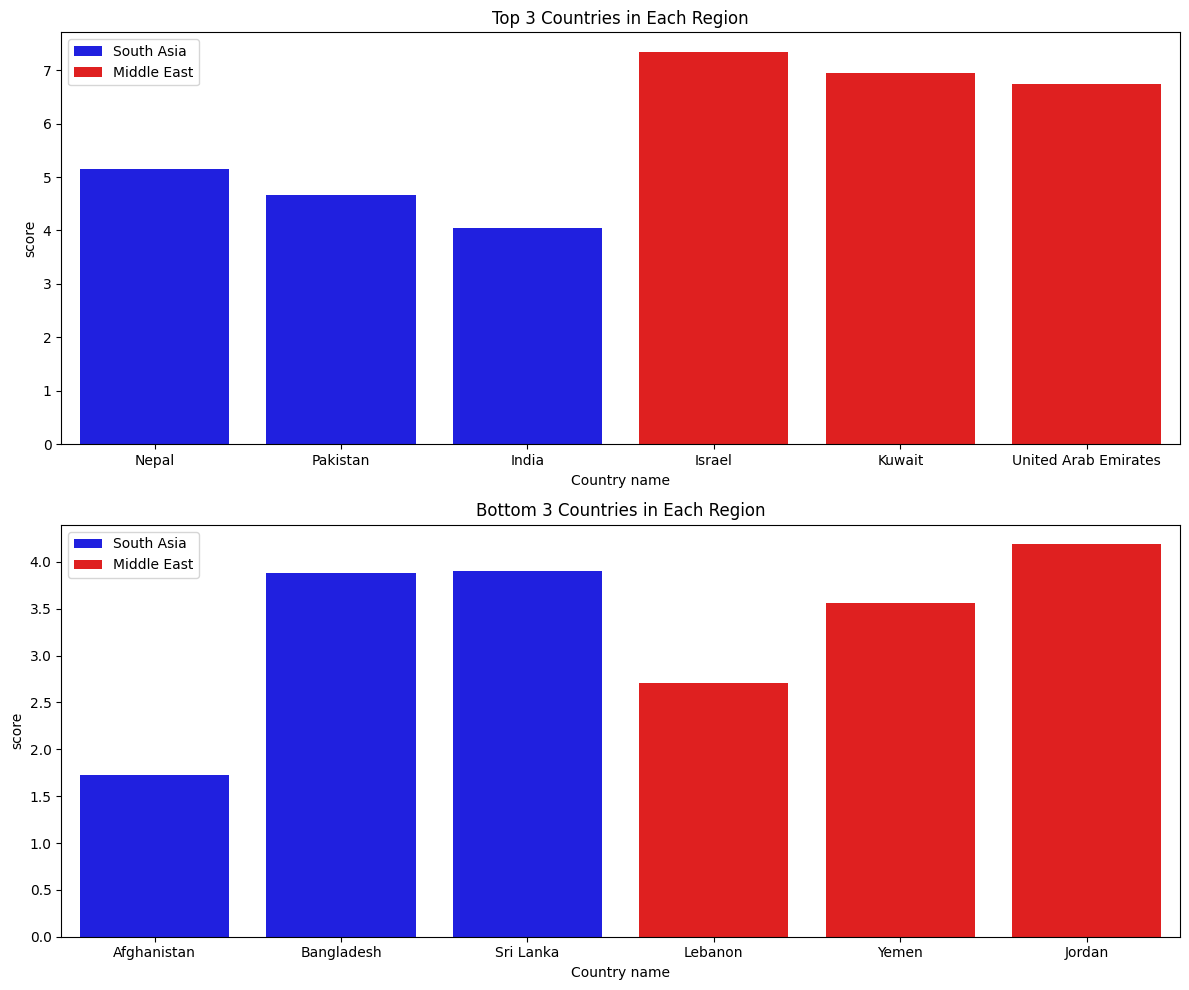


South Asia Top 3 Countries:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054

South Asia Bottom 3 Countries:
    Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898

Middle East Top 3 Countries:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

Middle East Bottom 3 Countries:
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


In [22]:
# Define function to display top and bottom performers
def display_performers(dataset, region_name):
    print(f"\n{region_name} Top 3 Countries:")
    print(dataset.nlargest(3, 'score')[['Country name', 'score']])
    print(f"\n{region_name} Bottom 3 Countries:")
    print(dataset.nsmallest(3, 'score')[['Country name', 'score']])

# Create visualization
plt.figure(figsize=(15, 6))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Identify top 3 countries in South Asia and Middle East
top_sa = south_asia_dataset.nlargest(3, 'score')
top_me = middle_east_dataset.nlargest(3, 'score')
sns.barplot(data=top_sa, x='Country name', y='score', ax=ax1, color='blue', label='South Asia')
sns.barplot(data=top_me, x='Country name', y='score', ax=ax1, color='red', label='Middle East')
ax1.set_title('Top 3 Countries in Each Region')
ax1.legend()

# Identify bottom 3 countries in South Asia and Middle East
bottom_sa = south_asia_dataset.nsmallest(3, 'score')
bottom_me = middle_east_dataset.nsmallest(3, 'score')
sns.barplot(data=bottom_sa, x='Country name', y='score', ax=ax2, color='blue', label='South Asia')
sns.barplot(data=bottom_me, x='Country name', y='score', ax=ax2, color='red', label='Middle East')
ax2.set_title('Bottom 3 Countries in Each Region')
ax2.legend()

plt.tight_layout()
plt.show()

# Display numeric results
display_performers(south_asia_dataset, "South Asia")
display_performers(middle_east_dataset, "Middle East")

###3. Metric Comparisons:
• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.

• Which metrics show the largest disparity between the two regions?

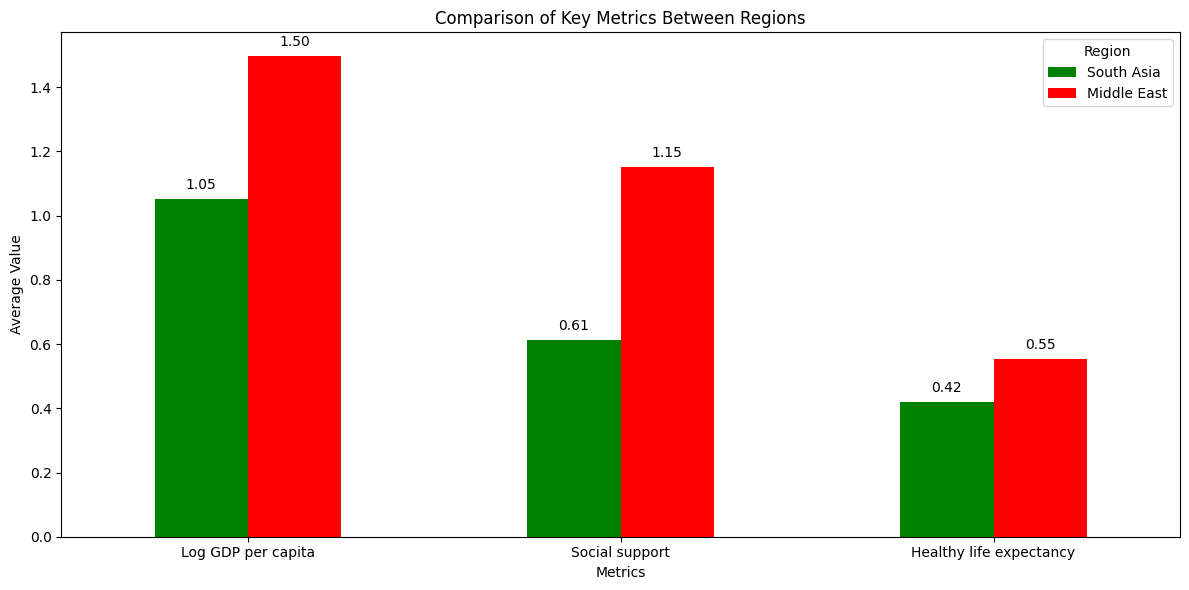


Metric Disparities (Middle East - South Asia):
Social support             0.540944
Log GDP per capita         0.444500
Healthy life expectancy    0.133778
dtype: float64


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Key metrics comparison
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

# Calculate regional averages
regional_comparison = pd.DataFrame({
    'South Asia': [south_asia_dataset[metric].mean() for metric in metrics],
    'Middle East': [middle_east_dataset[metric].mean() for metric in metrics]
}, index=metrics)

# Define colors for the bars (green for South Asia, red for Middle East)
colors = ['green', 'red']

# Create grouped bar chart
plt.figure(figsize=(12, 6))  # Set figure size
ax = regional_comparison.plot(kind='bar', figsize=(12, 6), color=colors, ax=plt.gca())

# Add annotations above each bar
for container in ax.containers:
    for bar in container:
        # Get the bar's x and y values
        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2
        ax.annotate(f'{height:.2f}',
                    xy=(x, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

plt.title('Comparison of Key Metrics Between Regions')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

# Calculate and display disparities
print("\nMetric Disparities (Middle East - South Asia):")
disparities = regional_comparison['Middle East'] - regional_comparison['South Asia']
print(disparities.sort_values(ascending=False))


###4. Happiness Disparity:
• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

• Which region has greater variability in happiness?

In [24]:
# Calculate range and CV for both regions
def calculate_disparity_metrics(dataset, region_name):
    score_range = dataset['score'].max() - dataset['score'].min()
    cv = dataset['score'].std() / dataset['score'].mean()*100
    return pd.Series({
        'Range': score_range,
        'Coefficient of Variation': cv
    }, name=region_name)

# Calculate metrics for both regions
sa_metrics = calculate_disparity_metrics(south_asia_dataset, 'South Asia')
me_metrics = calculate_disparity_metrics(middle_east_dataset, 'Middle East')

# Combine the results
disparity_comparison = pd.DataFrame([sa_metrics, me_metrics])
print("\nHappiness Disparity Metrics:")
print(disparity_comparison)

# Determine which region has greater variability
greater_variability = 'South Asia' if sa_metrics['Coefficient of Variation'] > me_metrics['Coefficient of Variation'] else 'Middle East'
print(f"\nRegion with greater variability: {greater_variability}")


Happiness Disparity Metrics:
             Range  Coefficient of Variation
South Asia   3.437                 30.214829
Middle East  4.634                 28.938881

Region with greater variability: South Asia


###5. Correlation Analysis:
• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.

• Create scatter plots to visualize and interpret the relationships.

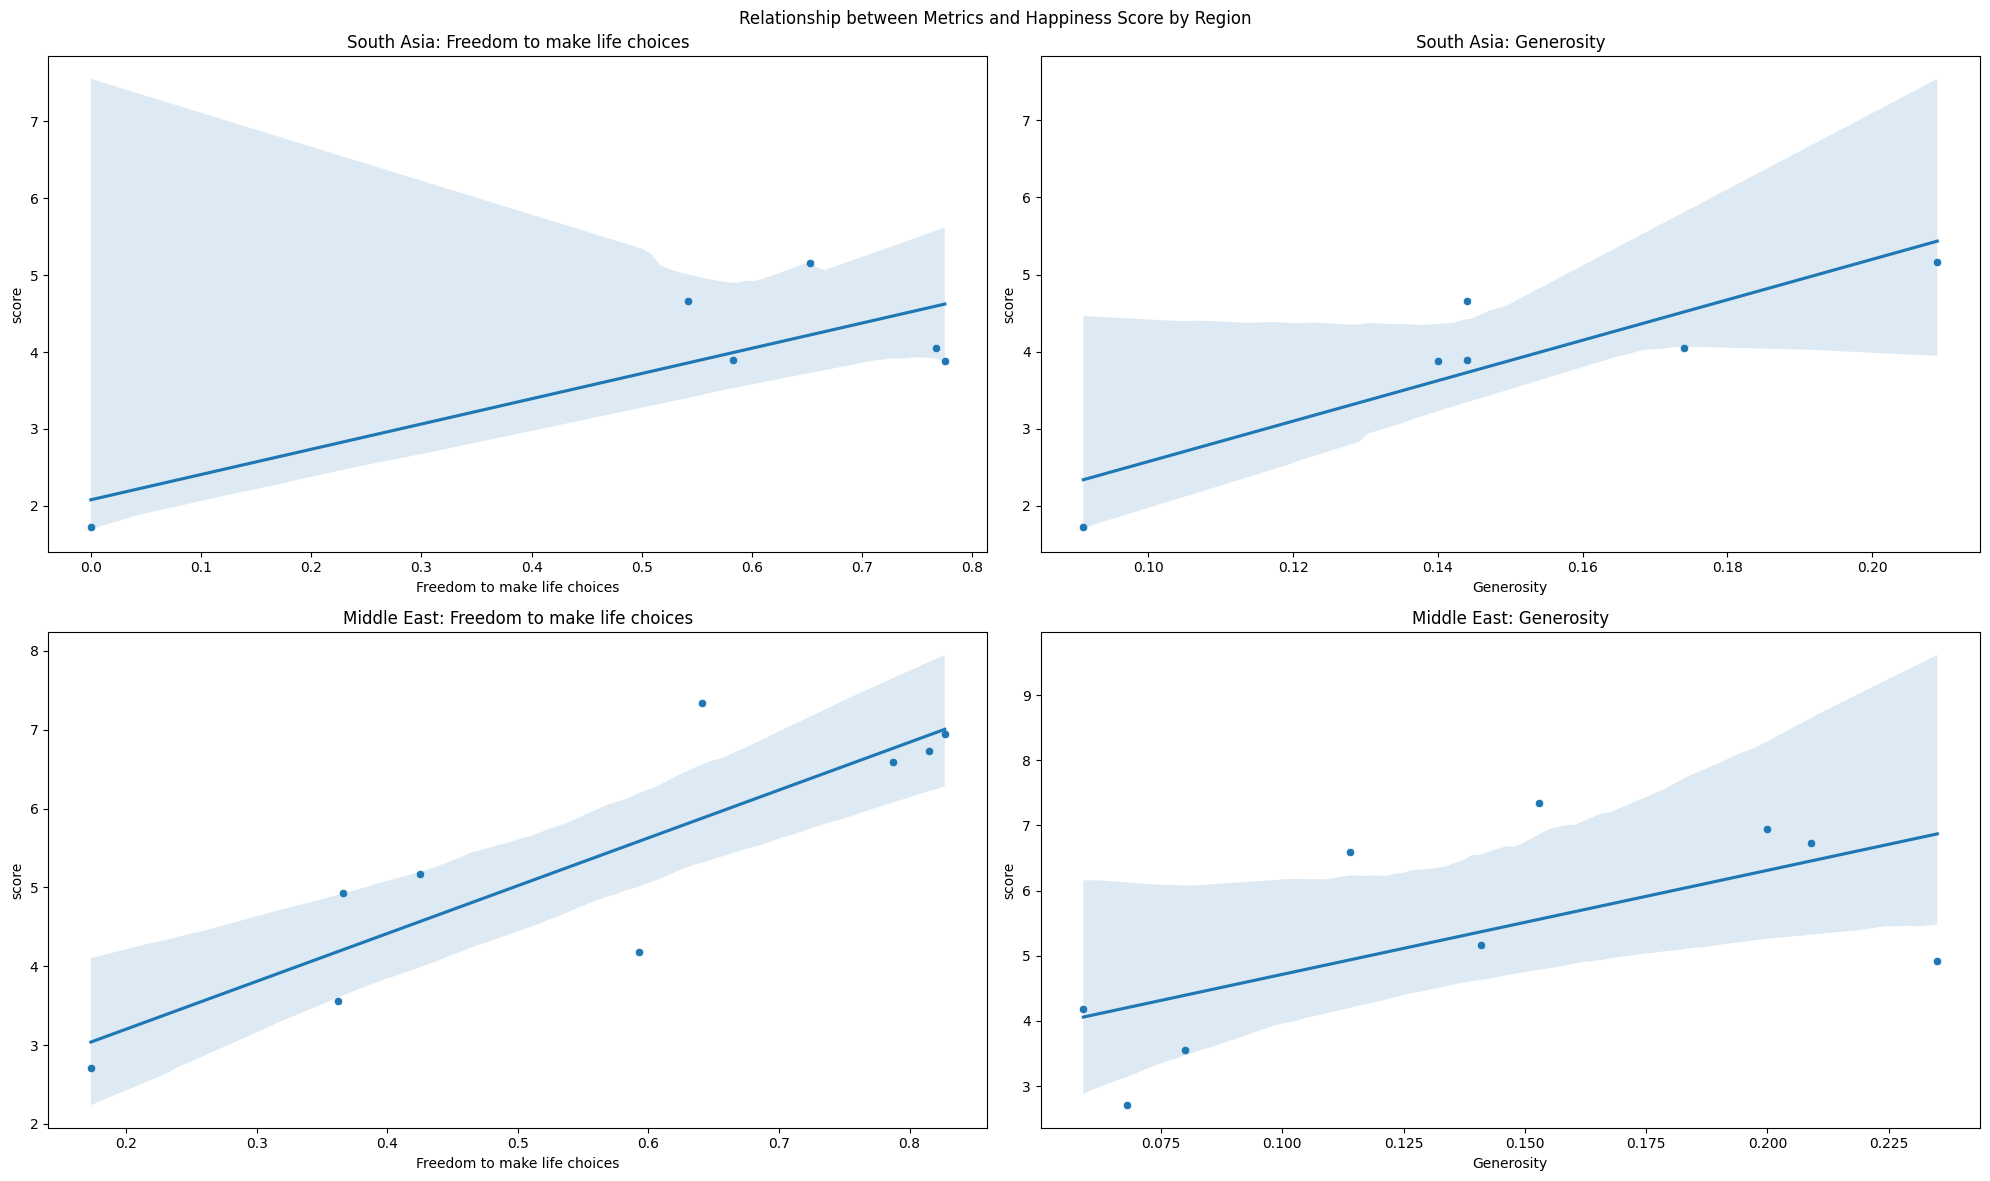


Correlations with Happiness Score:

South Asia:
Freedom to make life choices: 0.801
Generosity: 0.875

Middle East:
Freedom to make life choices: 0.863
Generosity: 0.628


In [25]:
# Calculate correlations for both regions
metrics = ['Freedom to make life choices', 'Generosity']

def analyze_correlations(dataset, region_name):
    correlations = {}
    for metric in metrics:
        corr = dataset['score'].corr(dataset[metric])
        correlations[metric] = corr
    return correlations

# Get correlations
sa_corr = analyze_correlations(south_asia_dataset, 'South Asia')
me_corr = analyze_correlations(middle_east_dataset, 'Middle East')

# Create scatter plots to visualize
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Relationship between Metrics and Happiness Score by Region')

for i, metric in enumerate(metrics):
    # South Asia
    sns.scatterplot(data=south_asia_dataset, x=metric, y='score', ax=axes[0, i])
    sns.regplot(data=south_asia_dataset, x=metric, y='score', ax=axes[0, i], scatter=False)
    axes[0, i].set_title(f'South Asia: {metric}')

    # Middle East
    sns.scatterplot(data=middle_east_dataset, x=metric, y='score', ax=axes[1, i])
    sns.regplot(data=middle_east_dataset, x=metric, y='score', ax=axes[1, i], scatter=False)
    axes[1, i].set_title(f'Middle East: {metric}')

plt.tight_layout()
plt.show()

# Print correlation results
print("\nCorrelations with Happiness Score:")
print("\nSouth Asia:")
for metric, corr in sa_corr.items():
    print(f"{metric}: {corr:.3f}")
print("\nMiddle East:")
for metric, corr in me_corr.items():
    print(f"{metric}: {corr:.3f}")

###6. Outlier Detection:
• Identify outlier countries in both regions based on Score and GDP per Capita.

• Plot these outliers and discuss their implications.

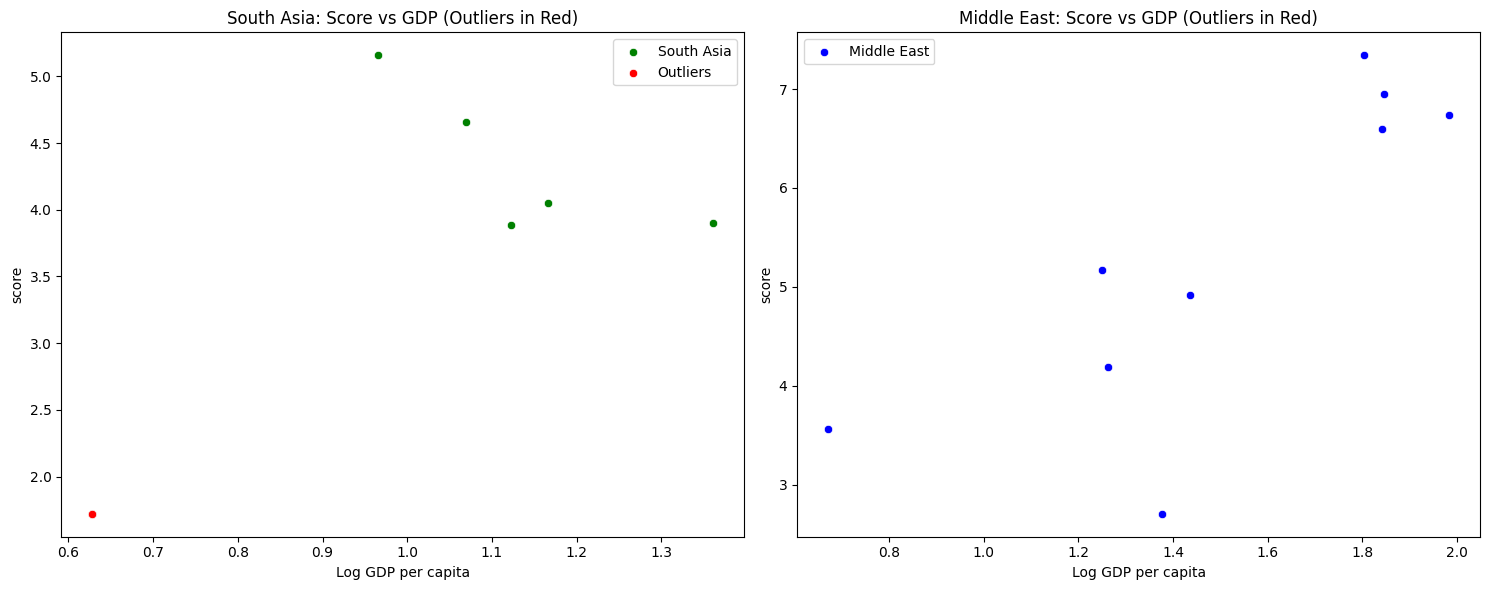


Outliers in South Asia:

score:
    Country name  score
142  Afghanistan  1.721

Log GDP per capita:
    Country name  Log GDP per capita
142  Afghanistan               0.628

Outliers in Middle East:

score:
Empty DataFrame
Columns: [Country name, score]
Index: []

Log GDP per capita:
Empty DataFrame
Columns: [Country name, Log GDP per capita]
Index: []


In [26]:
#Define function to identify outlier countries
def detect_outliers(dataset, columns):
    outliers = {}
    for col in columns:
        Q1 = dataset[col].quantile(0.25)
        Q3 = dataset[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    return outliers

# Detect outliers for both regions
metrics_to_check = ['score', 'Log GDP per capita']

sa_outliers = detect_outliers(south_asia_dataset, metrics_to_check)
me_outliers = detect_outliers(middle_east_dataset, metrics_to_check)

# Create scatter plots with outliers highlighted
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# South Asia plot
sns.scatterplot(data=south_asia_dataset, x='Log GDP per capita', y='score', ax=ax1,color='green', label='South Asia')
sns.scatterplot(data=sa_outliers['score'], x='Log GDP per capita', y='score',
                color='red', ax=ax1, label='Outliers')
ax1.set_title('South Asia: Score vs GDP (Outliers in Red)')

# Middle East plot
sns.scatterplot(data=middle_east_dataset, x='Log GDP per capita', y='score', ax=ax2,color='blue',  label='Middle East')
sns.scatterplot(data=me_outliers['score'], x='Log GDP per capita', y='score',
                color='red', ax=ax2, label='Outliers')
ax2.set_title('Middle East: Score vs GDP (Outliers in Red)')

plt.tight_layout()
plt.show()

# Print outlier details
print("\nOutliers in South Asia:")
for metric in metrics_to_check:
    print(f"\n{metric}:")
    print(sa_outliers[metric][['Country name', metric]])

print("\nOutliers in Middle East:")
for metric in metrics_to_check:
    print(f"\n{metric}:")
    print(me_outliers[metric][['Country name', metric]])

###7. Visualization:
• Create boxplots comparing the distribution of Score between South Asia and the Middle East.

• Interpret the key differences in distribution shapes, medians, and outliers.

<ipython-input-27-11cdb029352d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_data, x='Region', y='score',palette='Set1')


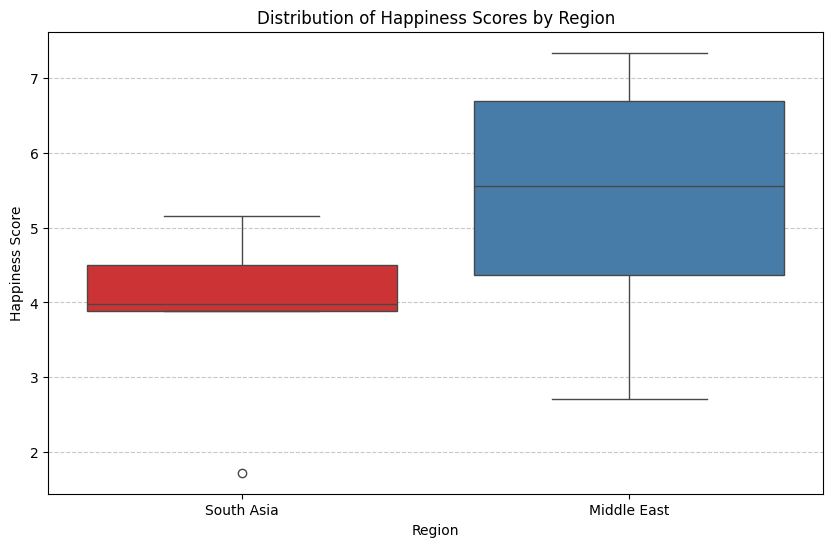


South Asia Distribution Statistics:
Median: 3.976
IQR: 0.617
Skewness: -1.440
Kurtosis: 2.954

Middle East Distribution Statistics:
Median: 5.562
IQR: 2.328
Skewness: -0.476
Kurtosis: -0.997


In [27]:
# Create box plots for comparison
plt.figure(figsize=(10, 6))
combined_data = pd.concat([
    south_asia_dataset.assign(Region='South Asia'),
    middle_east_dataset.assign(Region='Middle East')
])

sns.boxplot(data=combined_data, x='Region', y='score',palette='Set1')
plt.title('Distribution of Happiness Scores by Region')
plt.ylabel('Happiness Score')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

# Calculate and display distribution statistics
def print_distribution_stats(dataset, region_name):
    stats = dataset['score'].describe()
    print(f"\n{region_name} Distribution Statistics:")
    print(f"Median: {stats['50%']:.3f}")
    print(f"IQR: {stats['75%'] - stats['25%']:.3f}")
    print(f"Skewness: {dataset['score'].skew():.3f}")
    print(f"Kurtosis: {dataset['score'].kurtosis():.3f}")

print_distribution_stats(south_asia_dataset, "South Asia")
print_distribution_stats(middle_east_dataset, "Middle East")

The boxplot highlights key differences between South Asia and the Middle East:

- *Median*: The Middle East has a higher median happiness score compared to South Asia.  
- *Distribution*: South Asia shows a narrower range of scores, while the Middle East has a wider spread, indicating greater variability.  
- *Outliers*: South Asia has a noticeable outlier with a very low happiness score, whereas the Middle East does not show extreme outliers.  
- *Overall*: The Middle East has higher and more varied happiness scores, while South Asia's scores are more concentrated around the lower range.